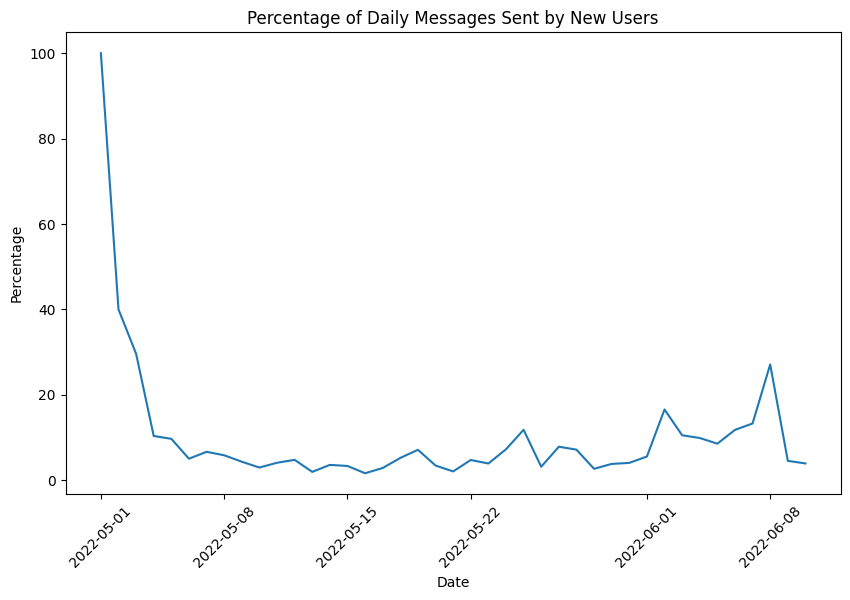

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
import numpy as np

# Read the CSV data
data = pd.read_csv('message_data.csv')

# Parse the message_time column to datetime type
data['message_time'] = data['message_time'].apply(parser.parse)

# Identify the first message dates for each author
first_message_dates = data.groupby('author_id')['message_time'].min().dt.date

# Calculate the count of new users per day
new_user_counts = first_message_dates.value_counts()

# Calculate the count of total messages sent per day
total_message_counts = data['message_time'].dt.date.value_counts()

# Calculate the percentage of daily messages sent by new users
percentage_new_users = (new_user_counts / total_message_counts) * 100

# Convert index and values to NumPy arrays
dates = percentage_new_users.index.to_numpy()
values = percentage_new_users.to_numpy()

# Generate the interactive chart
plt.figure(figsize=(10, 6))
plt.plot(dates, values)
plt.title('Percentage of Daily Messages Sent by New Users')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()